# 2D algorithm grouping hits in (phi,theta)    [doing...]

In [5]:
# I have to enhace my programs. Have a rudimentary study.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from split import *
from score import *
#from mpl_toolkits.mplot3d import Axes3D
#%matplotlib widget 

# Reading Data from data folder.

In [6]:
name = 'data2/55microns50psInner55microns50psOuter_EventNumber.txt' # To be modified for others. 
data_fraction = 1

df = pd.DataFrame()
df = pd.read_csv(name, sep=' ') # All data.
df,_ = Split_frac(df, data_fraction)

Computing neccessary values.

In [7]:
def rho(x,y):
    return np.sqrt(x*x + y*y)
def r(x,y,z):
    return np.sqrt(x*x + y*y + z*z)

#################################

def x0():
    return 

def y0():
    return 

def z0():
    return 

#################################

def theta(x,y,z):
    t = np.arctan(np.sqrt(x**2 + y**2)/z) 
    #if z < 0 :
    #    return np.pi - t # For BackWard hits (z < 0) we redefine the values of theta. MARK suggestion
    #elif z >= 0 : 
    return t

def dtheta(dz0, x, x0, y, y0, z, z0):
    # the next expression was computed from mathematica and is a simple approximation
    return dz0 * np.sqrt((x - x0)**2 + (y - y0)**2)/((x - x0)**2 + (y - y0)**2 + (z - z0)**2)
    
#################################    
    
def phi(x,y):
    return np.arctan(y/x)

def dphi(x, y, dx, dy):
    return (dy* x - dx *y)/(x**2 + y**2)

#################################

def t_c(hit_time, x, y, z):
    c = 0.299792 # Light Velocity in [mm/ps]  
    travel_time = np.sqrt(x*x + y*y + z*z)/c
    return hit_time - travel_time
def dt_c(dt_hit):
    return dt_hit 


In [8]:
df['theta']  = df.apply(lambda row: theta(row['x'], row['y'], row['z'] ),  axis=1 )   
#df['dtheta'] = df.apply(lambda row: dtheta( row['dz0'],  row['x'], row['x0'], row['y'] row['y0']),          axis=1 ) 
#dtheta(dz0, x, x0, y, y0, z, z0)
df['phi']    = df.apply(lambda row: phi  (row['x'], row['y']),             axis=1 )  
#df['dphi']   = df.apply(lambda row: dphi  (row['x'], row['y']),            axis=1 ) 
  
df['t_c']    = df.apply(lambda row: t_c (row['t'], row['x'], row['y'], row['z']),   axis=1 )   
#df['dt_c']   = df.apply(lambda row: dt_c (row['x'], row['y']),             axis=1 )  

# Plotting $\phi$ vs $\theta$


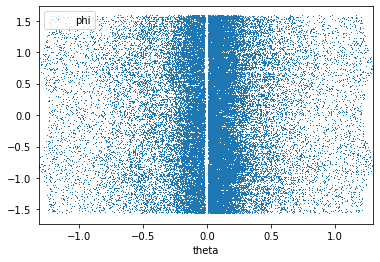

In [9]:
df.plot('theta', 'phi', style=',')

Now I will plot $\theta$ vs. $\phi$ with different colours according to particle id information. 

So, before I am going to plot the same but for the first particle.

In [10]:
df_particle_0 = df[df['particle_id']==0]

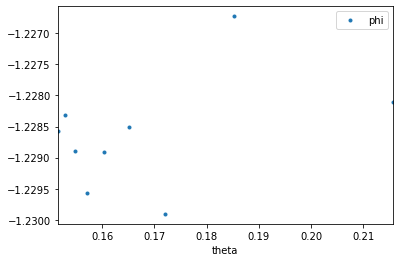

In [11]:
df_particle_0.plot('theta', 'phi', style='.')

To the second particle ... or another particle_id.

df_particle_1 = df[df['particle_id']==10]
df_particle_1.plot('theta', 'phi', style='.')

Now I am trying to group throught colours.

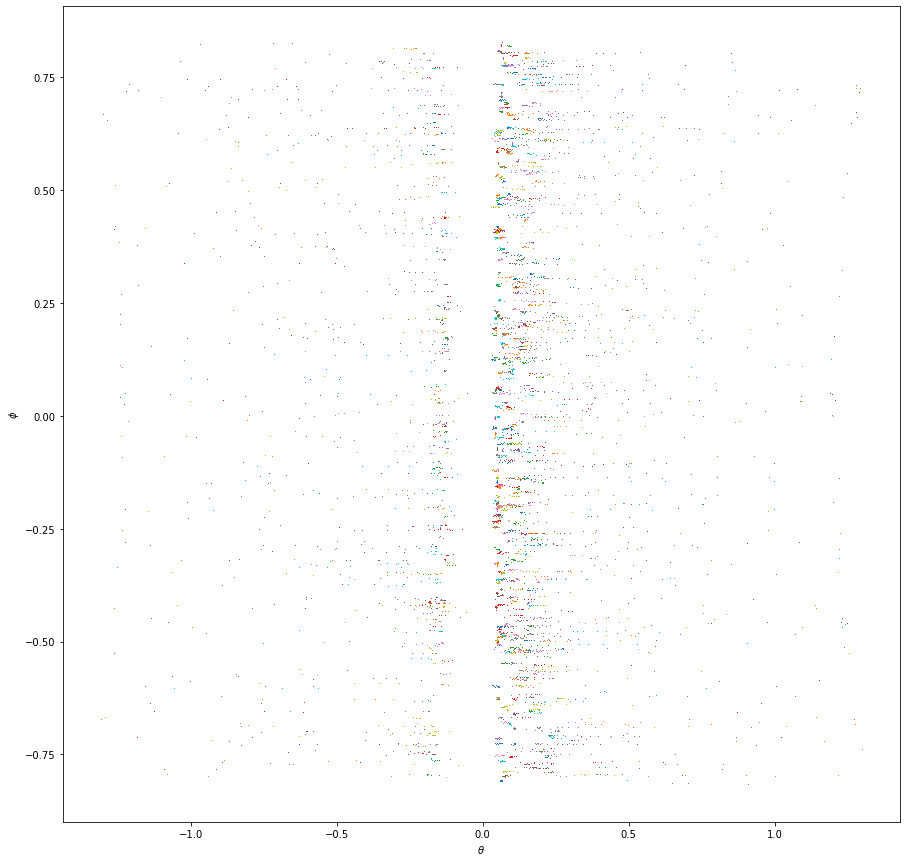

In [12]:
plt.figure(figsize=(15, 15))
for particle_id in np.unique(df['particle_id'].values[1:1000]):
    track_id = df.query(f'particle_id == {particle_id}')
    plt.plot(track_id['theta'], track_id['phi'], ',' )
    plt.xlabel(r"$\theta$")
    plt.ylabel(r'$\phi$')

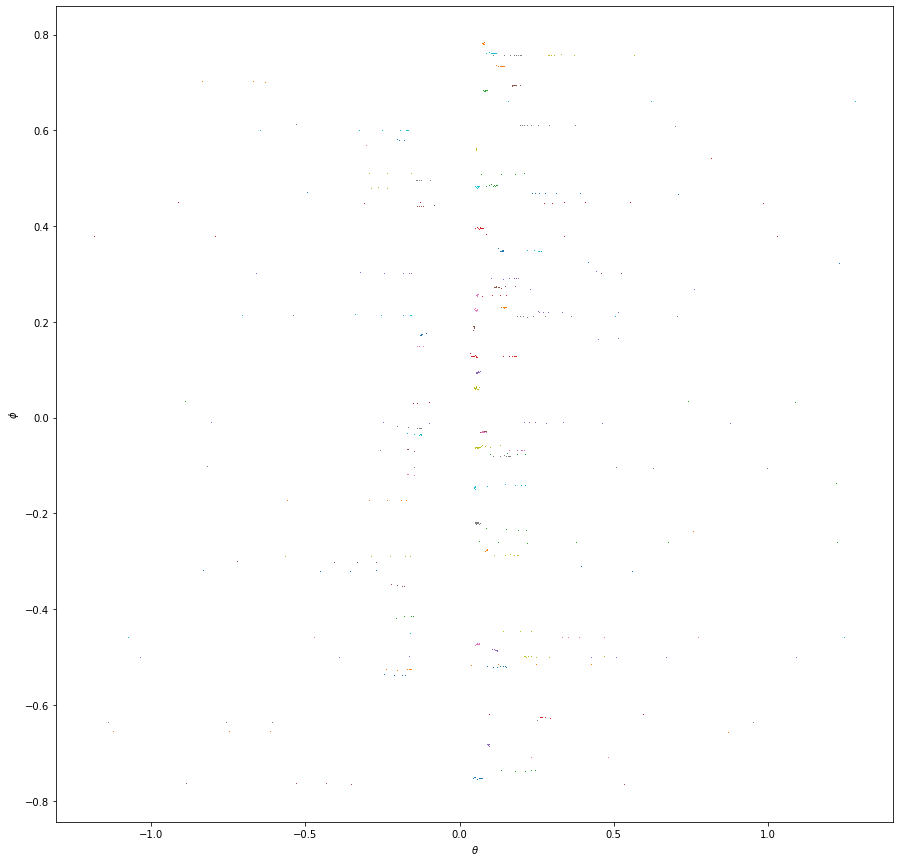

In [13]:
plt.figure(figsize=(15, 15))
for particle_id in np.unique(df['particle_id'].values[0:100]):
    track_id = df.query(f'particle_id == {particle_id}')
    plt.plot(track_id['theta'], track_id['phi'], ',' )
    plt.xlabel(r"$\theta$")
    plt.ylabel(r'$\phi$')

# I am constructing the algorithm to identify pattern in the above graphic. 
Eventually we can do proofs with 

# Number of true particles

In [14]:
def number_of_true_particles():
    tmp = df['particle_id'].unique() 
    n = len(tmp)
    print(n)
    return n 
number_of_true_particles() < len(df) 
print('because')
print(len(df))
n = number_of_true_particles()

16920
because
86401
16920


# Particle_ID Distribution
This graphic show us that not there are particles that have less than 3 hits. 

In [15]:
df_sort_id = df.sort_values('particle_id')

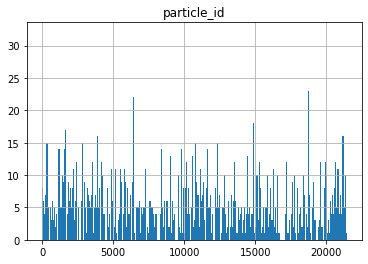

In [16]:
hist_p_id = df.hist('particle_id', bins=n)

For example, we can compute the minimum value. 

In [18]:
df_particle_id_values = df_sort_id['particle_id'].values
hist_values, hist_bins = np.histogram(df_particle_id_values, bins=n )

print(hist_values)
print(hist_bins)
print('minimum value: ', min(hist_values))


[11  2  0 ...  1  1  6]
[0.00000000e+00 1.26666667e+00 2.53333333e+00 ... 2.14294667e+04
 2.14307333e+04 2.14320000e+04]
minimum value:  0


# ADDING TIME information. 
## Projections of $\theta$ and $\phi$ on $t$ axis

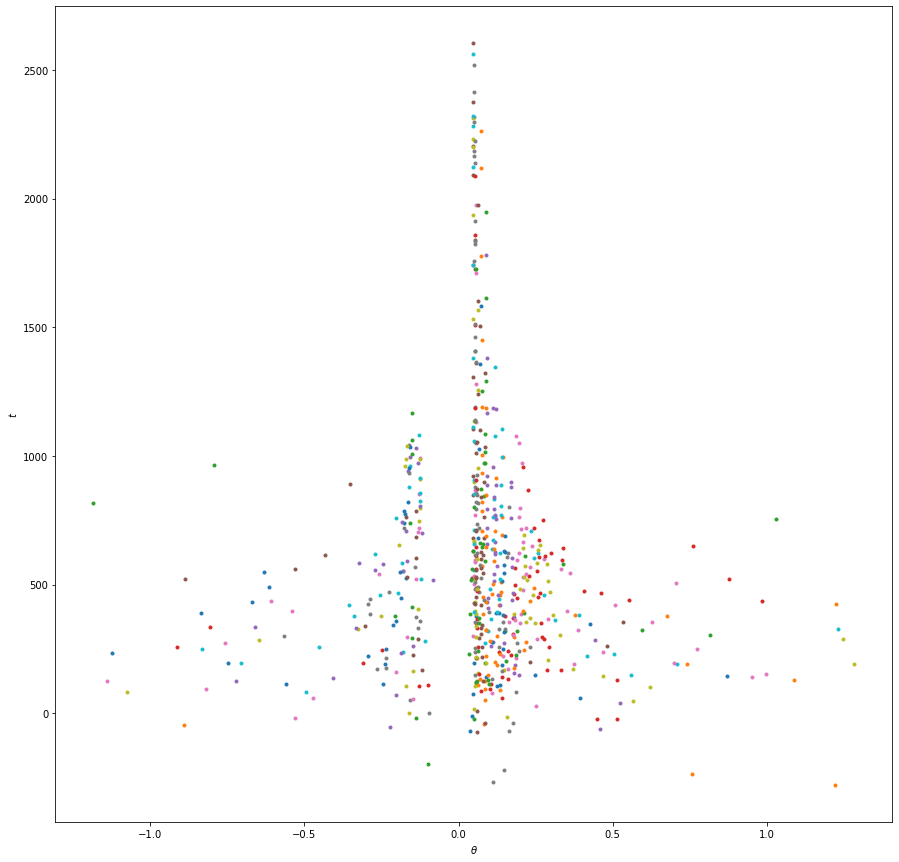

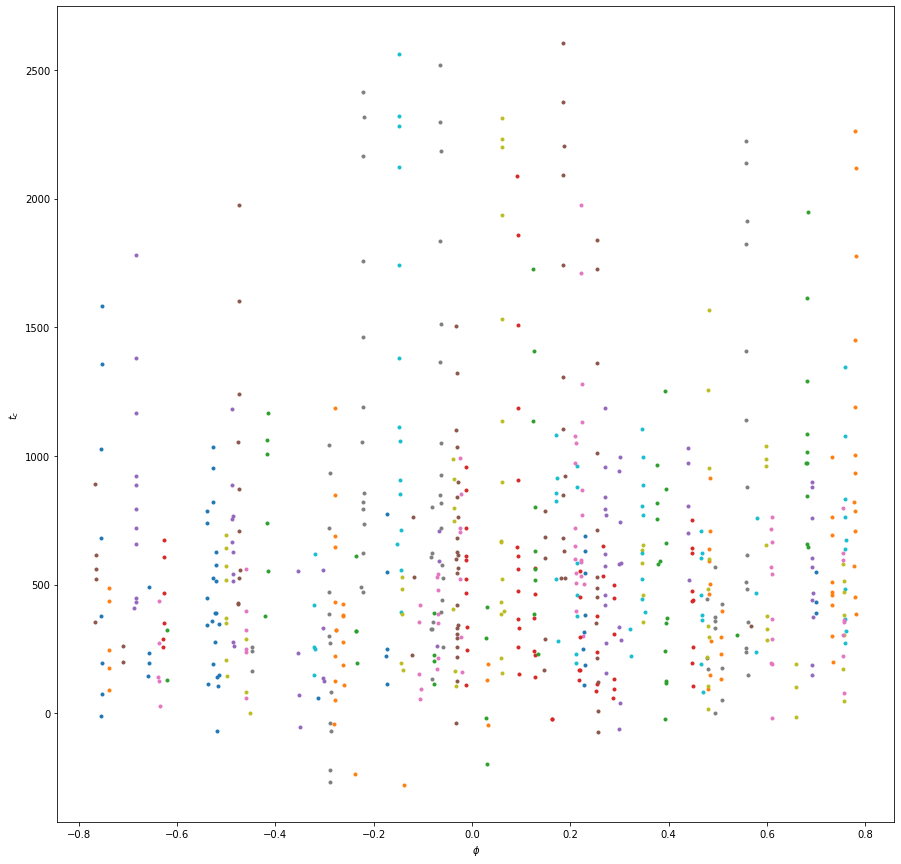

In [22]:
def time_information():
    #PROBABLY THIS CAN BE A FUNCTION TO PLOT CORRELATION BETWEEN VARIABLES. LIKE ROOT
    plt.figure(figsize=(15, 15))
    for particle_id in np.unique(df['particle_id'].values[1:100]):
        track_id = df.query(f'particle_id == {particle_id}')
        plt.plot(track_id['theta'], track_id['t'], '.' )
        plt.xlabel(r"$\theta$")
        plt.ylabel(r'$t$')
    plt.figure(figsize=(15, 15))
    for particle_id in np.unique(df['particle_id'].values[1:100]):
        track_id = df.query(f'particle_id == {particle_id}')
        plt.plot(track_id['phi'], track_id['t'], '.' )
        plt.xlabel(r"$\phi$")
        plt.ylabel(r'$t_c$')        
time_information()

# Conclusions

Adding time information to tracking particles(algorithm) solve immediately the problem. But it is neccessary to correct the time. ...

On another side, it is easy to see that there is an increase in time for each particle.

Not yet, there is a interpretation of $t$ vs $\theta$. 

## Why means CORRECTED TIME. 
$t_c$  = Hit Time - time taken to travel from Origin to hit possition.

The above statement means that the computed time give us  the possiblity to group particles according its arival order. 

Computing ...

PROOFS related to time information. 

## Distribution of time to see the behavior of Initial Time.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fce42280c88>]],
      dtype=object)

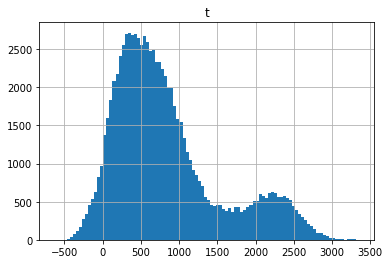

In [23]:
df.hist('t', bins = 100)

The above graphics means that there are a lot of particles that arrive to 3,4 or 5 Detector.

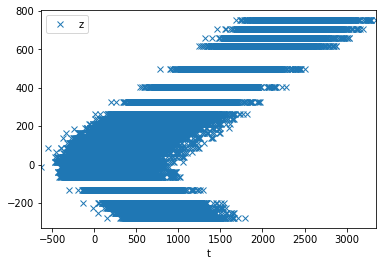

In [24]:
df.plot('t', 'z', style='x') # A simple remainder of our first result

# Correct Time

In [25]:
df['t_c'] = t_c(df['t'],df['x'],df['y'], df['z'] )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fce423cbac8>]],
      dtype=object)

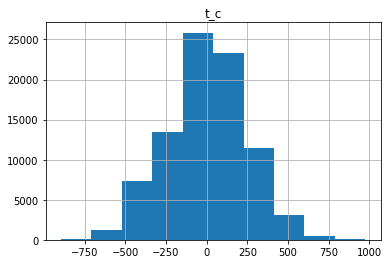

In [26]:
df.hist('t_c') # Okay

# Again
# Plotting $t_c$ vs. $\theta$ and $\phi$ .

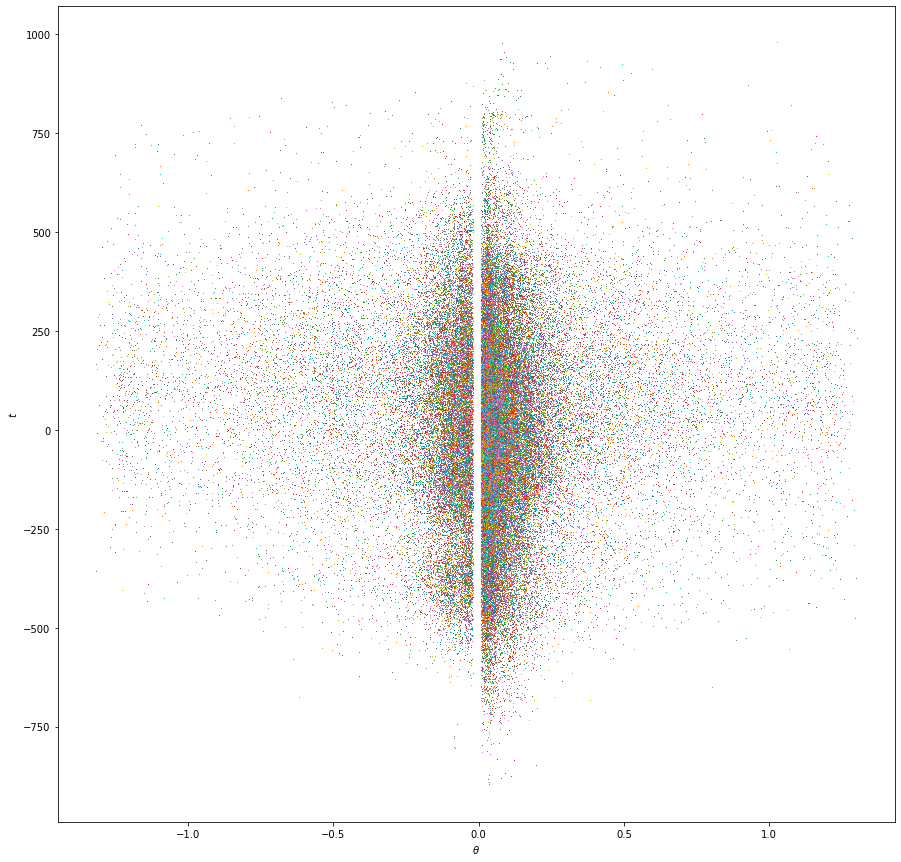

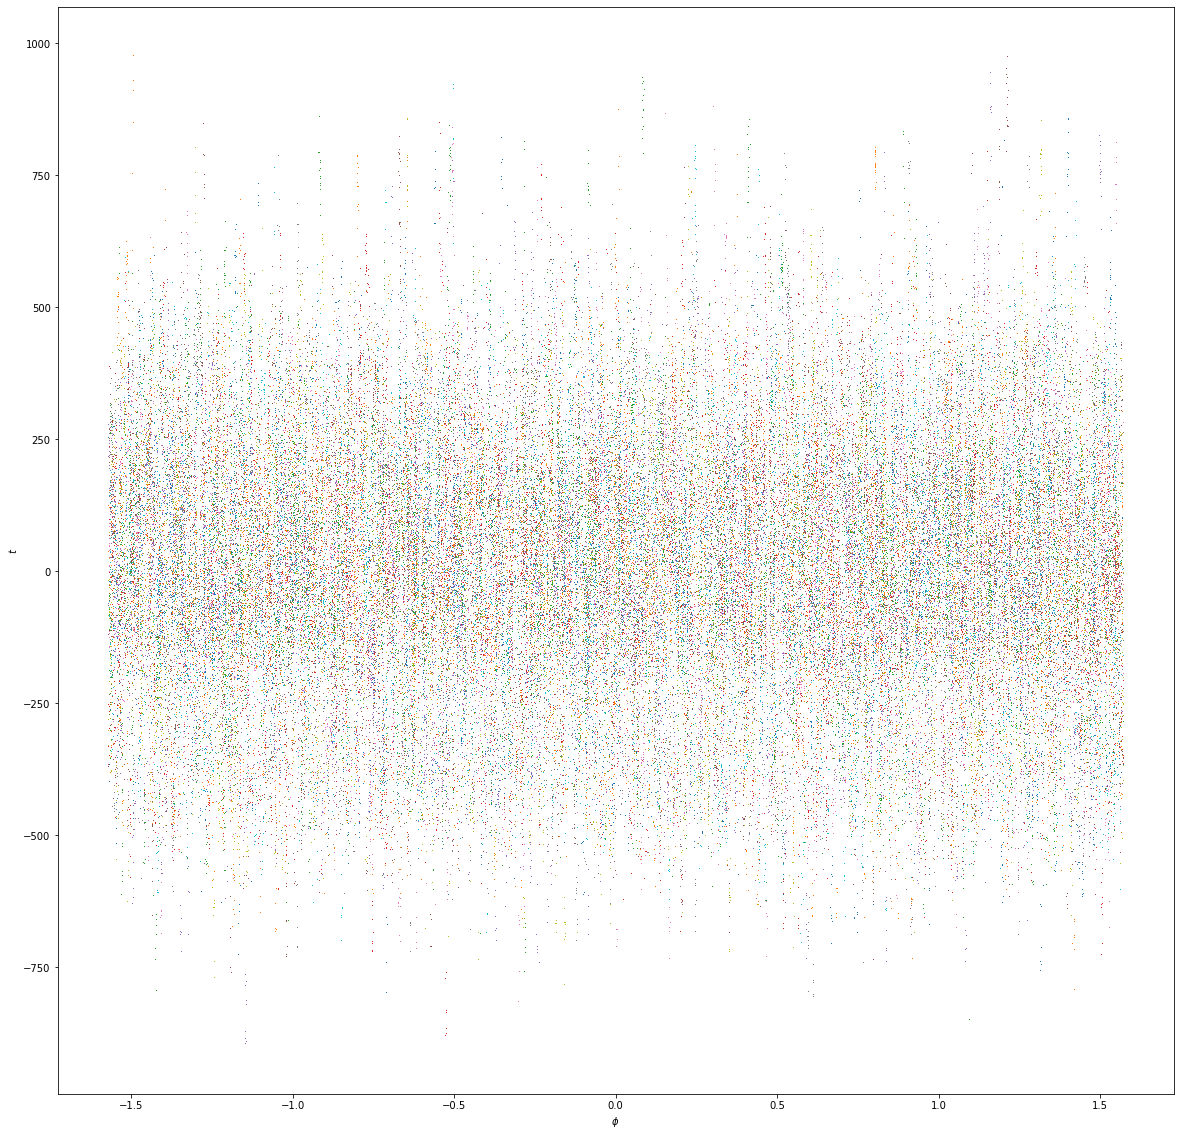

In [27]:
def time_plot():
    # Here, time is corrected by a substraction.
    plt.figure(figsize=(15, 15))
    for particle_id in np.unique(df['particle_id'].values):
        track_id = df.query(f'particle_id == {particle_id}')
        plt.plot(track_id['theta'], track_id['t_c'], ',' )
        plt.xlabel(r"$\theta$")
        plt.ylabel(r'$t$')
    plt.figure(figsize=(20, 20))
    for particle_id in np.unique(df['particle_id'].values):
        track_id = df.query(f'particle_id == {particle_id}')
        plt.plot(track_id['phi'], track_id['t_c'], ',' )
        plt.xlabel(r"$\phi$")
        plt.ylabel(r'$t$')
time_plot() 

# Proofs: 

# 1th Proof.
What you could do is plot this spread on a graph and I would expect this to be a Gaussian, since this hits are smeered using Gaussians.
To see this we make an histogram of average time of all particles. 


In [ ]:
def average_time():
    # Here, time is corrected by a substraction.
    t_average = []
    for particle_id in np.unique(df['particle_id'].values):
        track_id = df.query(f'particle_id == {particle_id}')
        #print(track_id['t'])
        t_average.append(track_id['t_c'].median())
        #print(track_id['t'].median())
    plt.figure()
    plt.hist(t_average)
    plt.xlabel('t_correct')
    plt.plot()
average_time() 

This plot give us an idea that data(time) is not spread correctly like a gaussian.

But if we plot(histogram) t_c - <t_c>

In [ ]:
def translation_time():
    plt.figure()
    for particle_id in np.unique(df['particle_id'].values):
        
        track_id = df.query(f'particle_id == {particle_id}')
        t_average = track_id['t_c'].median()
        
        tmp = track_id['t_c'].map(lambda x: x-t_average)
        tmp.plot.hist()
    
translation_time() 

Another trying 

In [ ]:
def translation_time2():
    plt.figure()
    all_data_time = []
    for particle_id in np.unique(df['particle_id'].values[1:100]):
        
        track_id = df.query(f'particle_id == {particle_id}')
        t_average = track_id['t_c'].median()
        
        tmp = track_id['t_c'].map(lambda x: x-t_average)
        all_data_time.append(list(tmp.values))
        
    plt.hist(all_data_time)
    plt.plot()
translation_time2() 


# 2th Proof.

ENOUGH PROOFS. 

In [ ]:
# Solve the problem of add a new column to the data frame with another column adding a new simple operation.

In [ ]:
df.head()

In [ ]:
df['new_column']=df['x'].map(lambda x: x+2)

In [ ]:
df['new_column'].head()

In [ ]:
df['new_column']

# TIME VS $\phi$ VS $\theta$. A 3 dimensional graphic.

In [ ]:
df.query('z==-277').head()

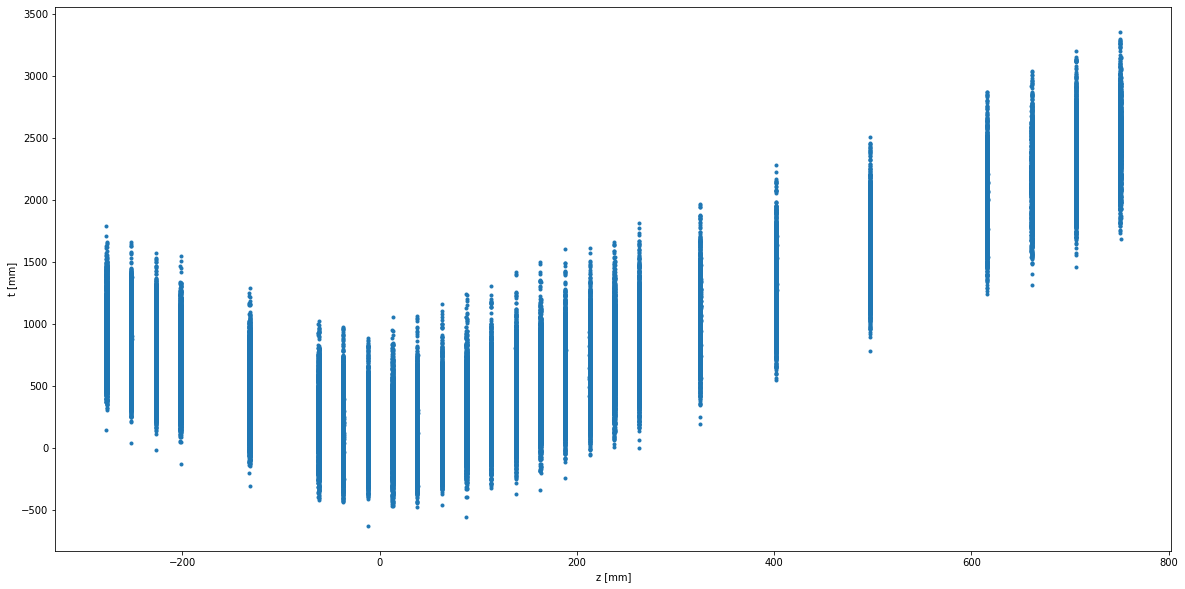

In [29]:
plt.figure(figsize=(20,10))
plt.xlabel('z [mm]')
plt.ylabel('t [mm]')
plt.plot(df.z.values,df.t.values, '.')

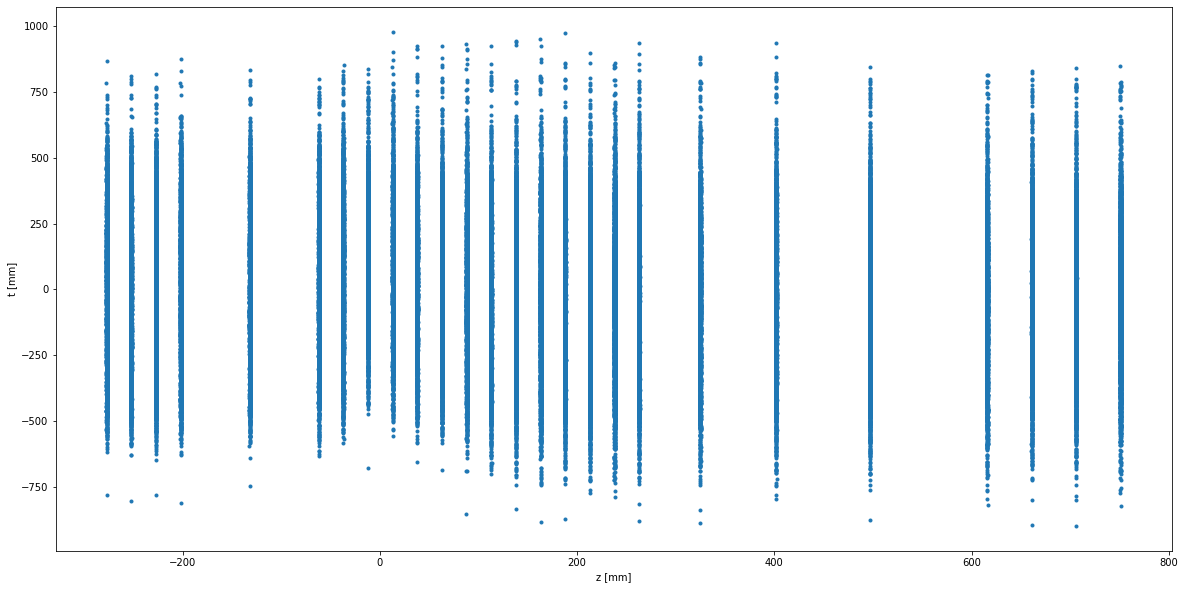

In [30]:
plt.figure(figsize=(20,10))
plt.xlabel('z [mm]')
plt.ylabel('t [mm]')
plt.plot(df.z.values,df.t_c.values, '.')

In [31]:
np.zeros(15)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])